# Breast Cancer Data Challenge
# Summary

In [79]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from scipy import stats
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df_cancer = pd.read_csv('breast-cancer-wisconsin.data', header = None)

In [80]:
df_cancer.columns = ['clump_thick', 'uniform_csize', 'uniform_cshape', 'adhesion', 'epithelial_size', 
                     'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class']

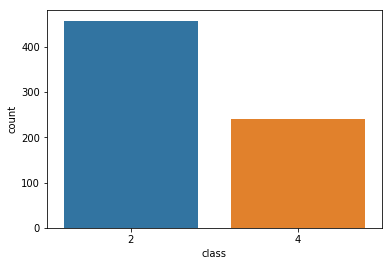

In [81]:
sns.countplot(x="class", data=df_cancer)

In [82]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump_thick        699 non-null int64
uniform_csize      699 non-null int64
uniform_cshape     699 non-null int64
adhesion           699 non-null int64
epithelial_size    699 non-null int64
nuclei             699 non-null object
chromatin          699 non-null int64
nucleoli           699 non-null int64
mitoses            699 non-null int64
class              699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [53]:
df_cancer['nuclei'] = pd.to_numeric(df_cancer['nuclei'], errors = 'coerce')
# df_cancer['nuclei'].to_numeric()

[Text(0.5, 0, 'clump_thick'),
 Text(1.5, 0, 'uniform_csize'),
 Text(2.5, 0, 'uniform_cshape'),
 Text(3.5, 0, 'adhesion'),
 Text(4.5, 0, 'epithelial_size'),
 Text(5.5, 0, 'nuclei'),
 Text(6.5, 0, 'chromatin'),
 Text(7.5, 0, 'nucleoli'),
 Text(8.5, 0, 'mitoses')]

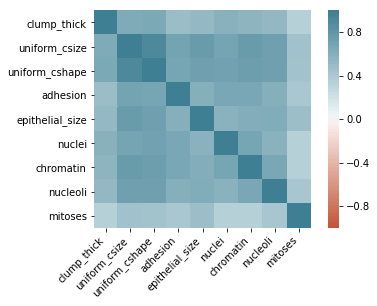

In [54]:
corr = df_cancer[['clump_thick', 'uniform_csize', 'uniform_cshape', 'adhesion', 'epithelial_size', 
                     'nuclei', 'chromatin', 'nucleoli', 'mitoses']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

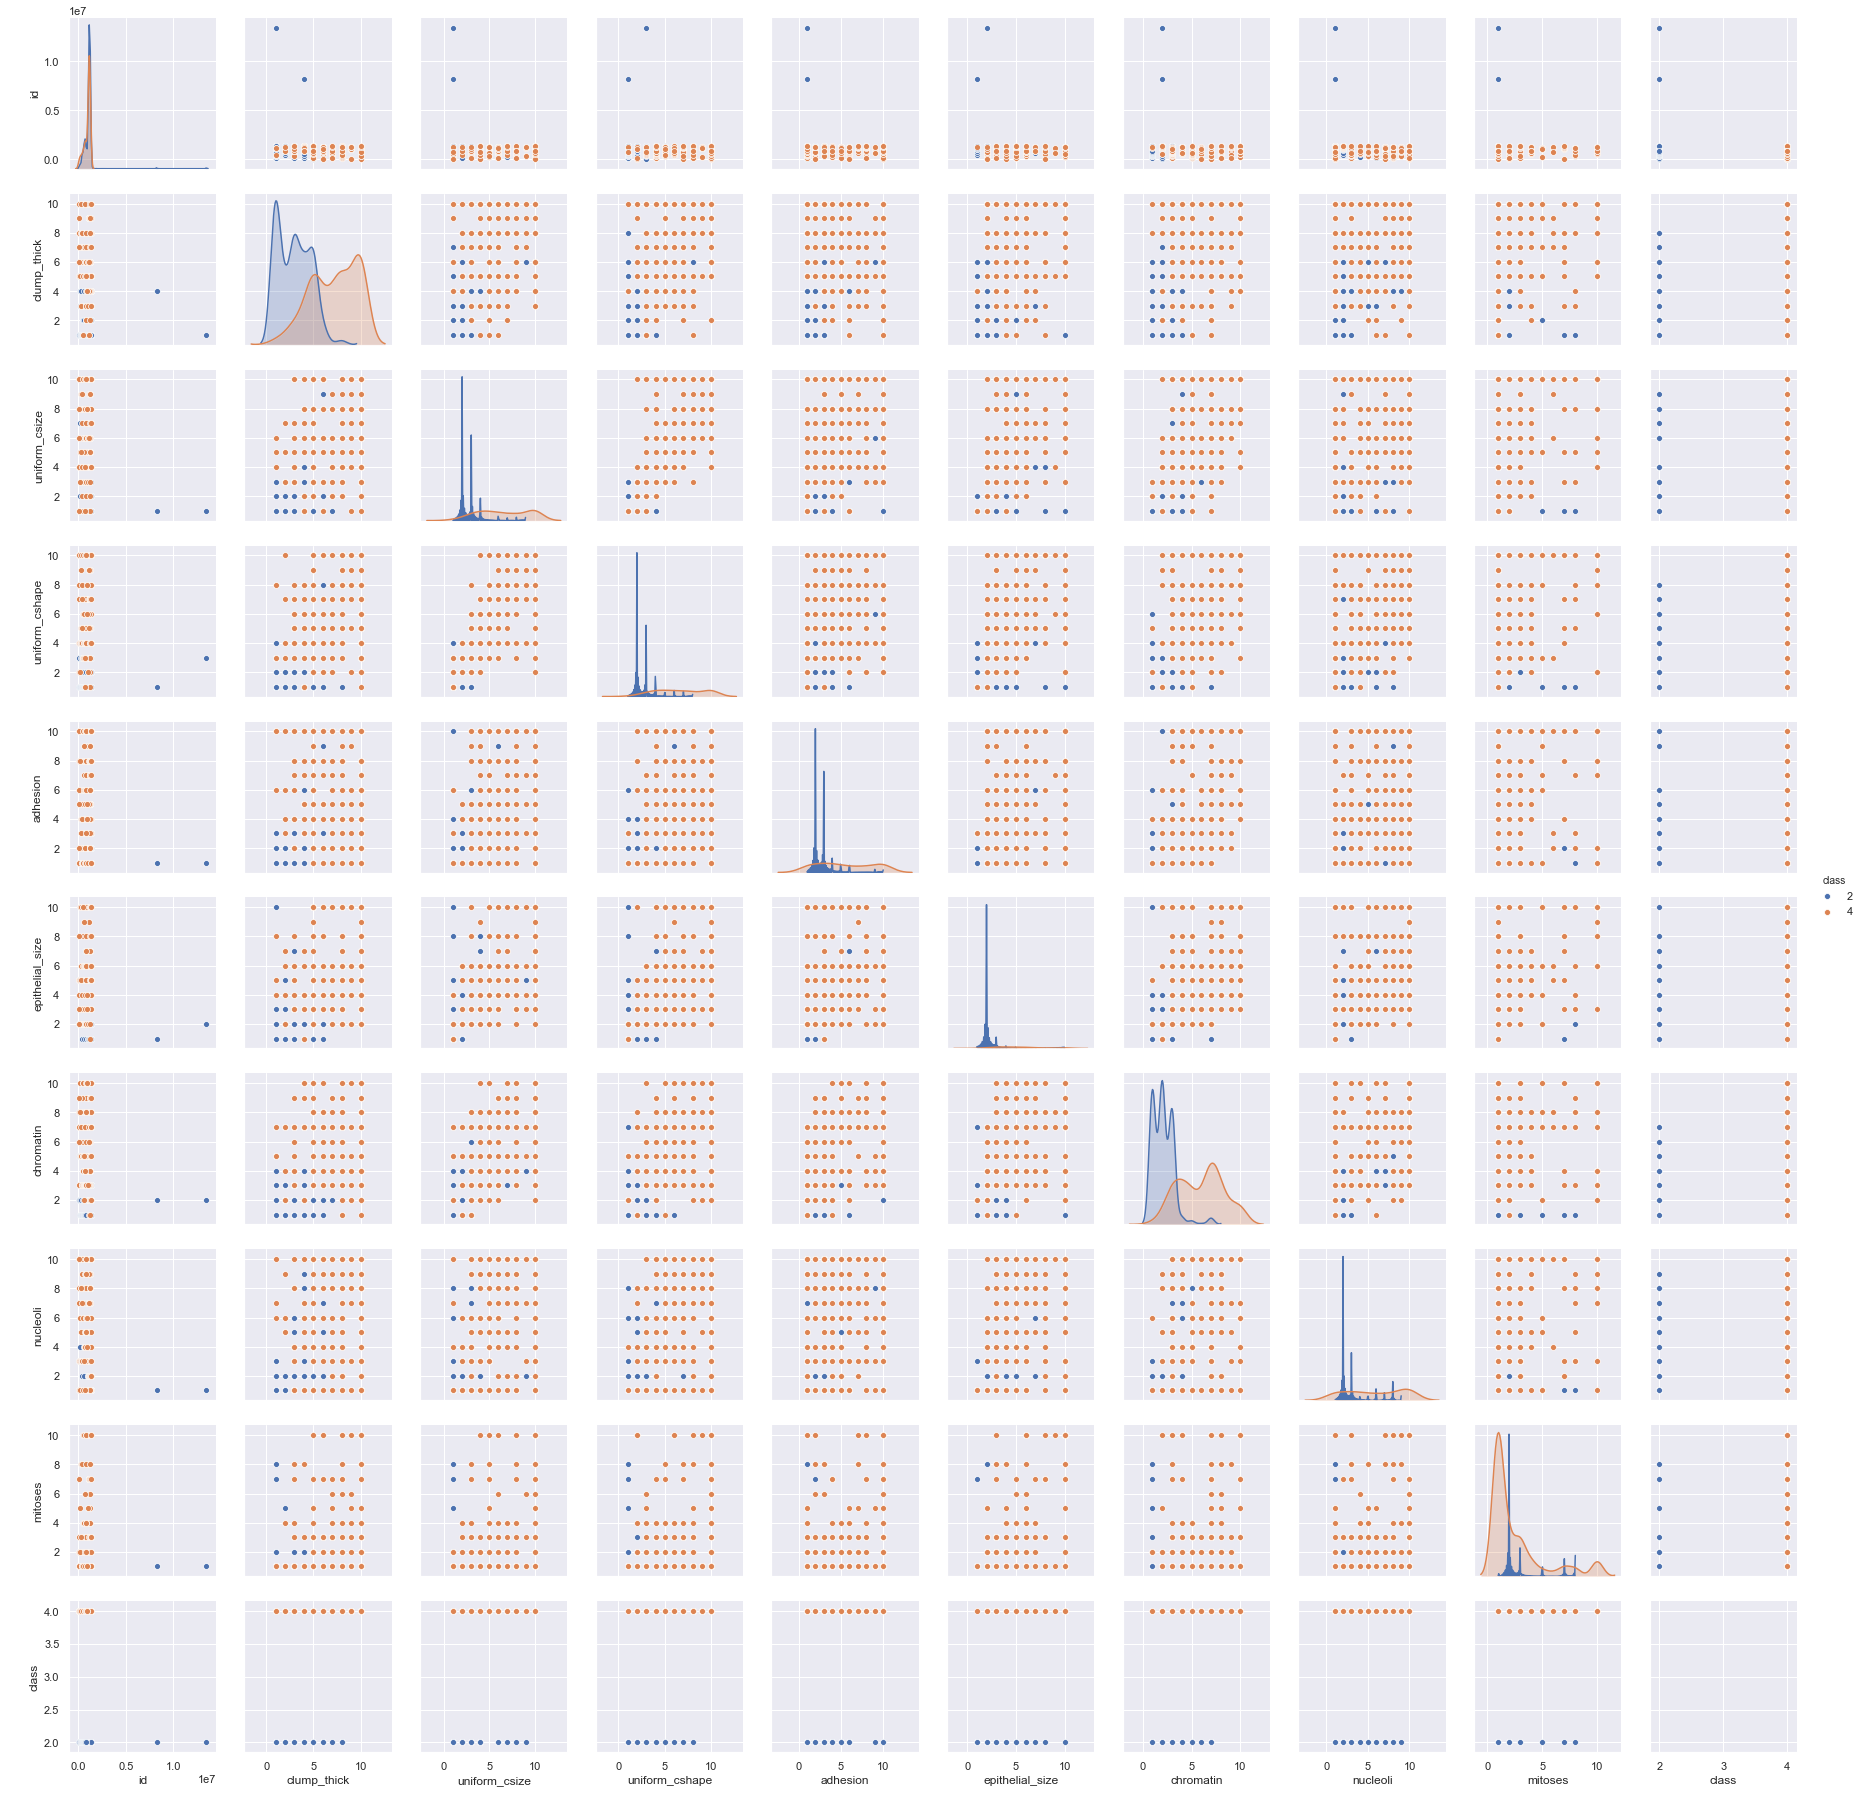

In [36]:
sns.pairplot(df_cancer, hue='class')

In [55]:
df_cancer = df_cancer.dropna()

In [56]:
X_train, X_val, y_train, y_val = train_test_split(df_cancer[['clump_thick', 'uniform_csize', 
                                                             'uniform_cshape', 'adhesion', 'epithelial_size', 
                                                             'nuclei', 'chromatin', 'nucleoli', 'mitoses']], 
                                                  df_cancer['class'], test_size=0.20)

In [57]:
num_tree = 10000
clf = RandomForestClassifier(n_estimators=num_tree, max_depth = 12,
                             random_state=21, criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [58]:
y_val_pred = clf.predict(X_val)
y_train_pred = clf.predict(X_train)

In [59]:
# validation set accuracy
print(accuracy_score(y_val, y_val_pred))

# train set accuracy
print(accuracy_score(y_train, y_train_pred))

0.9708029197080292
1.0


In [60]:
# from sklearn.metrics import confusion_matrix
cm_val = confusion_matrix(y_val, y_val_pred)

cm_train = confusion_matrix(y_train, y_train_pred)

In [61]:
cm_val

array([[83,  3],
       [ 1, 50]])

In [62]:
print(clf.feature_importances_)

[0.06 0.26 0.19 0.04 0.1  0.2  0.09 0.05 0.01]


Feature ranking:


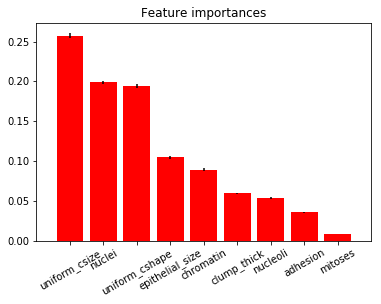

In [63]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")



plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices]/np.sqrt(num_tree), align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 30)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Confusion matrix, without normalization
[[83  3]
 [ 1 50]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


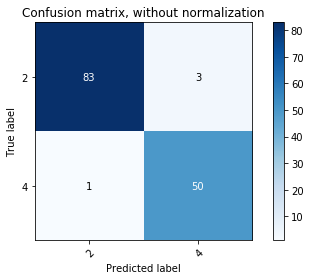

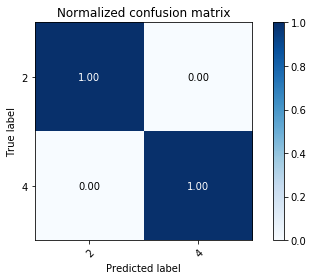

In [64]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_val, y_val_pred, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_train_pred, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [66]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# # train XGBoost model
# X,y = shap.datasets.boston()
# model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# # explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [71]:
shap_values

[array([[ 0.03,  0.09,  0.07, ...,  0.03,  0.01,  0.  ],
        [ 0.01, -0.17, -0.12, ..., -0.07, -0.02,  0.  ],
        [-0.06, -0.16, -0.01, ..., -0.1 , -0.05, -0.01],
        ...,
        [ 0.02,  0.09,  0.07, ...,  0.04,  0.02,  0.  ],
        [-0.  ,  0.09,  0.09, ..., -0.09,  0.02,  0.01],
        [ 0.03,  0.09,  0.07, ...,  0.03,  0.01,  0.  ]]),
 array([[-0.03, -0.09, -0.07, ..., -0.03, -0.01, -0.  ],
        [-0.01,  0.17,  0.12, ...,  0.07,  0.02, -0.  ],
        [ 0.06,  0.16,  0.01, ...,  0.1 ,  0.05,  0.01],
        ...,
        [-0.02, -0.09, -0.07, ..., -0.04, -0.02, -0.  ],
        [ 0.  , -0.09, -0.09, ...,  0.09, -0.02, -0.01],
        [-0.03, -0.09, -0.07, ..., -0.03, -0.01, -0.  ]])]

In [77]:
explainer.expected_value

[0.6555239920890017, 0.3444760071215569]

In [76]:
len(X_train.iloc[0,:])

9

In [ ]:
# Henry
df.isnull().values.any()
df.unique
# data leakage
df.unique().shape
df.duplicated()
sn.heatmap()
featimportance

In [ ]:
# Vidit
pd.Categorical(cancerdata.class.map)
drop('id')
make_corr_plot(df_cancer)
# dont remove duplicate id: unbalanced data
kernel density estimate (plots)
drop_features
# make roc curve
# important to check the recall, dont want to miss malignant patients
# recall